In [6]:
''' Importing Required Libraries '''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [7]:
''' Loading the Dataset '''
JEd_df = pd.read_csv('data/student_details.csv')
JEd_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Basic Metrics

In [8]:
JEd_df.shape

(500, 9)

In [9]:
JEd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [10]:
JEd_df.iloc[:,1:].describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [11]:
JEd_df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [12]:
JEd_df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

## Data Preprocessing

In [13]:
JEd_df.drop('Serial No.',axis = 1,inplace=True)  # Dropping Unique Identifier
JEd_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [14]:
JEd_df.rename(columns = {'LOR ':'LOR','Chance of Admit ' : 'Chance of Admit'},inplace=True) # Renaming columns to remove space at end

In [15]:
JEd_df.to_csv('EdData.csv',index=False)

In [16]:
JEd_df.isna().sum() # Checking No.of Null values in each column

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no null values in any of the columns.

In [17]:
JEd_df.duplicated().sum() # Checking Number of Duplicate Rows

0

No duplicate rows present

## Non-Visual Analysis

In [18]:
''' Percentage of students with research experience '''
JEd_df['Research'].value_counts(normalize=True)

Research
1    0.56
0    0.44
Name: proportion, dtype: float64

- 56% of students are having research experience while 44% of students are not having research experience.

In [19]:
'''Features of Students having Chance of Admission more than 90% '''
Top10 = JEd_df[JEd_df['Chance of Admit'] > 0.9].iloc[:,:-1].describe().iloc[1:,:]
Top10

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
mean,332.852459,116.213115,4.655738,4.549180,4.516393,9.523443,1.0
std,5.319261,2.614796,0.479070,0.462826,0.524144,0.213158,0.0
min,320.000000,110.000000,4.000000,3.000000,3.500000,9.060000,1.0
25%,330.000000,115.000000,4.000000,4.000000,4.000000,9.380000,1.0
50%,334.000000,116.000000,5.000000,4.500000,4.500000,9.500000,1.0
75%,337.000000,118.000000,5.000000,5.000000,5.000000,9.670000,1.0
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.0


In [20]:
''' Top 10 Students based on TOEFL Score '''
TOEFL_Scores = JEd_df['TOEFL Score'].sort_values(ascending=False)
Top10_TOEFLScores =TOEFL_Scores.head(10)
Top10_TOEFLScores

202    120
212    120
497    120
97     120
25     120
143    120
81     120
297    120
203    120
24     119
Name: TOEFL Score, dtype: int64

In [21]:
''' Top 10 Students based on CGPA '''
CGPA = JEd_df['CGPA'].sort_values(ascending=False)
Top10_CGPA =CGPA.head(10)
Top10_CGPA

143    9.92
202    9.91
496    9.87
203    9.87
425    9.86
385    9.82
148    9.80
34     9.80
24     9.80
213    9.78
Name: CGPA, dtype: float64

In [22]:
''' Top 20 Students based on SOP '''
SOP = JEd_df['SOP'].sort_values(ascending = False)
Top20_SOP = SOP.head(20)
Top20_SOP

45     5.0
189    5.0
35     5.0
284    5.0
276    5.0
260    5.0
259    5.0
258    5.0
91     5.0
234    5.0
215    5.0
213    5.0
212    5.0
211    5.0
70     5.0
288    5.0
71     5.0
72     5.0
152    5.0
151    5.0
Name: SOP, dtype: float64

In [23]:
''' Top 20 Students based on LOR '''
LOR = JEd_df['LOR'].sort_values(ascending = False)
Top20_LOR = LOR.head(20)
Top20_LOR

172    5.0
384    5.0
427    5.0
426    5.0
425    5.0
424    5.0
423    5.0
34     5.0
35     5.0
268    5.0
189    5.0
385    5.0
191    5.0
203    5.0
362    5.0
360    5.0
337    5.0
81     5.0
193    5.0
46     5.0
Name: LOR, dtype: float64

## Visual Analysis

### Univariate Analysis

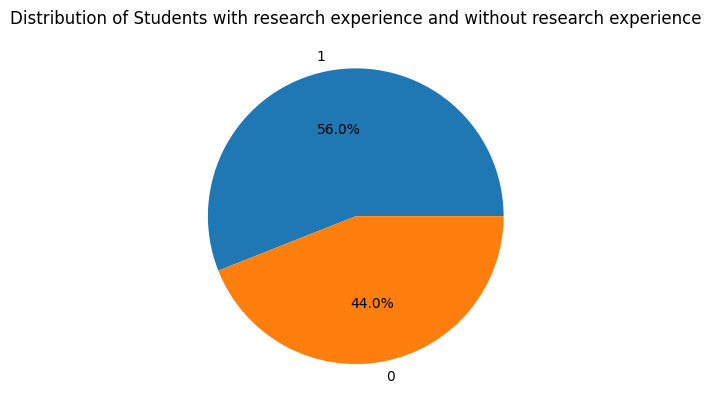

In [24]:
research_exp = JEd_df['Research'].value_counts(normalize=True)*100
labels = research_exp.index
sizes = research_exp.values
plt.pie(sizes,labels = labels,autopct ="%1.1f%%")
plt.title("Distribution of Students with research experience and without research experience")
plt.show()

- 56% of students are having research experience while 44% of students are not having research experience.

<Axes: xlabel='CGPA'>

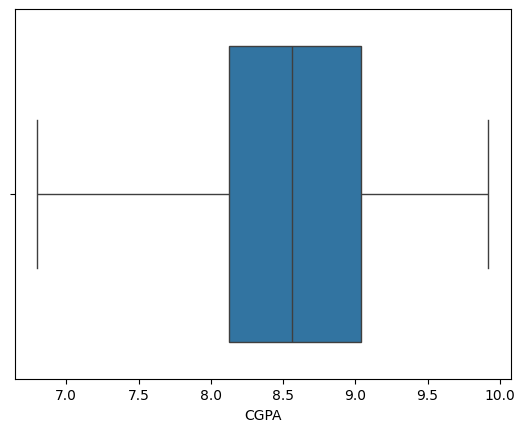

In [25]:
sns.boxplot(x=JEd_df['CGPA'])

<Axes: xlabel='GRE Score'>

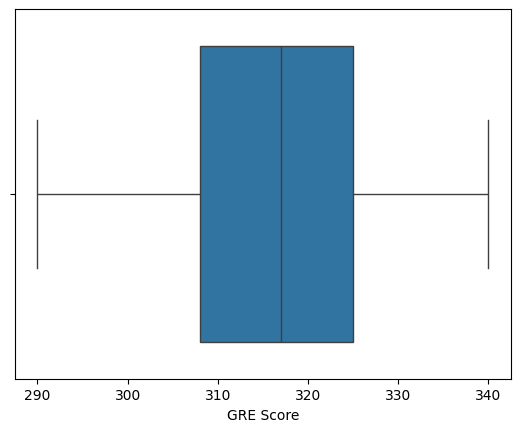

In [26]:
sns.boxplot(x=JEd_df['GRE Score'])

<Axes: xlabel='TOEFL Score'>

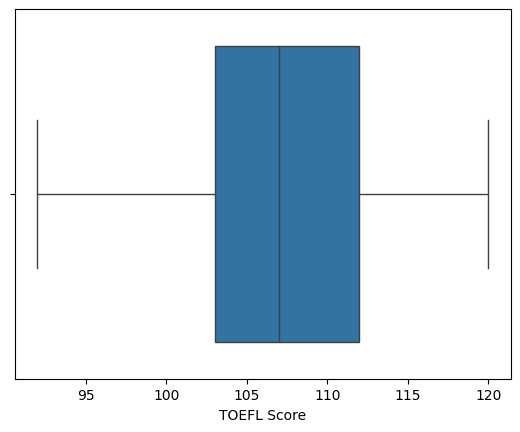

In [27]:
sns.boxplot(x=JEd_df['TOEFL Score'])

<Axes: xlabel='Chance of Admit'>

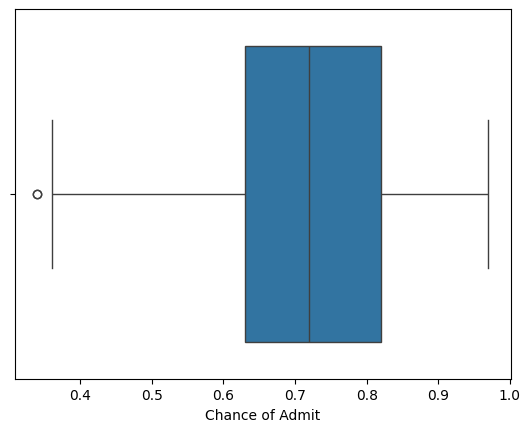

In [28]:
sns.boxplot(x=JEd_df['Chance of Admit'])

<Axes: xlabel='University Rating', ylabel='count'>

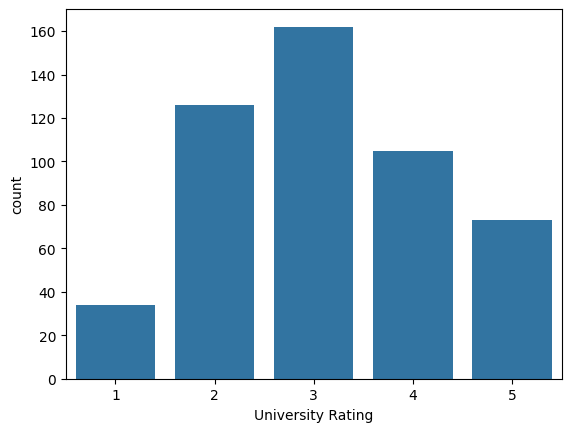

In [29]:
sns.countplot(x=JEd_df['University Rating'])

<Axes: xlabel='SOP', ylabel='count'>

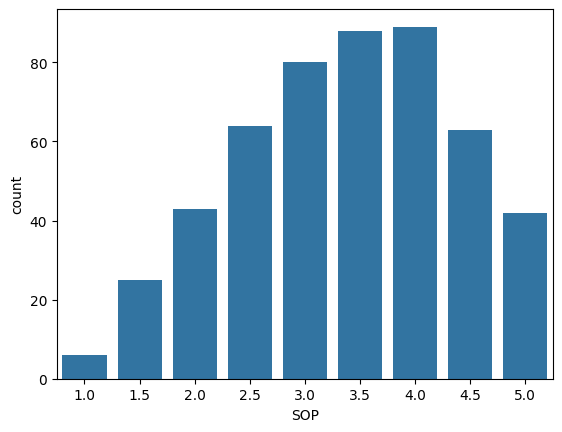

In [30]:
sns.countplot(x=JEd_df['SOP'])

<Axes: xlabel='LOR', ylabel='count'>

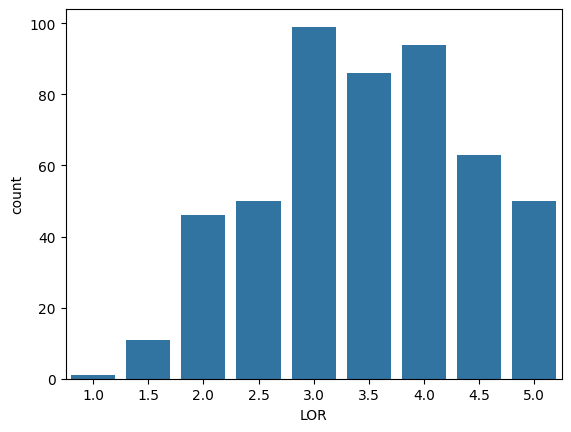

In [31]:
sns.countplot(x=JEd_df['LOR'])

### Bivariate Analysis

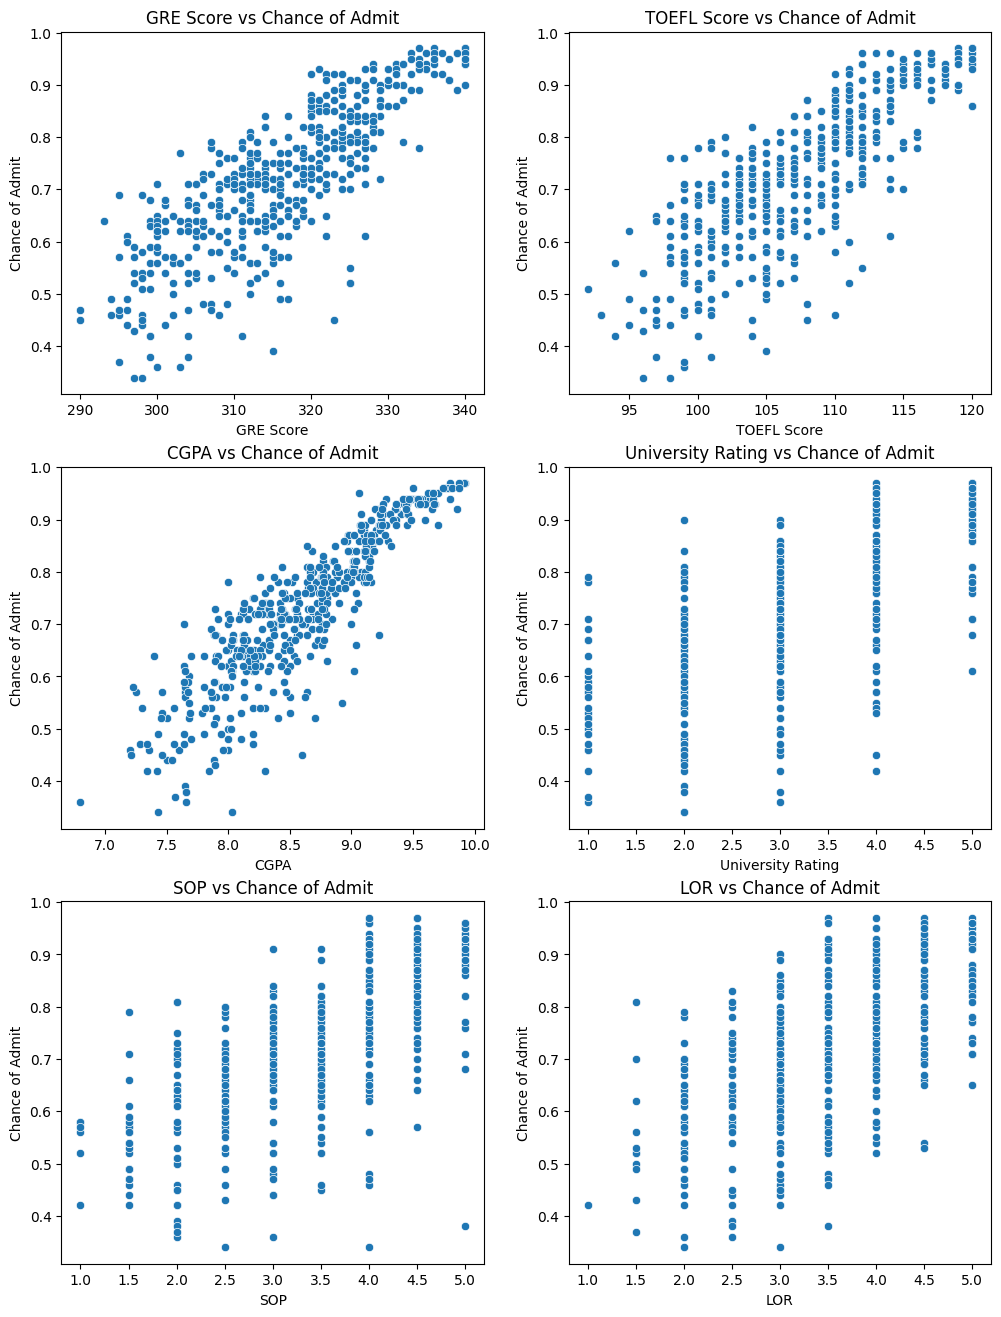

In [32]:
# Set up the subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 16))

# Subplot 1: GRE Score vs Chance of Admit
sns.scatterplot(x=JEd_df['GRE Score'],y=JEd_df['Chance of Admit'],ax=axes[0, 0])
axes[0, 0].set_title("GRE Score vs Chance of Admit")

# Subplot 2: TOEFL Score vs Chance of Admit
sns.scatterplot(x=JEd_df['TOEFL Score'],y=JEd_df['Chance of Admit'],ax=axes[0, 1])
axes[0, 1].set_title("TOEFL Score vs Chance of Admit")

# Subplot 3: CGPA vs Chance of Admit
sns.scatterplot(x=JEd_df['CGPA'],y=JEd_df['Chance of Admit'],ax=axes[1, 0])
axes[1, 0].set_title("CGPA vs Chance of Admit")

# Subplot 4: 
sns.scatterplot(x=JEd_df['University Rating'],y=JEd_df['Chance of Admit'],ax=axes[1, 1])
axes[1, 1].set_title("University Rating vs Chance of Admit")

# Subplot 5: 
sns.scatterplot(x=JEd_df['SOP'],y=JEd_df['Chance of Admit'],ax=axes[2, 0])
axes[2, 0].set_title("SOP vs Chance of Admit")

# Subplot 6: 
sns.scatterplot(x=JEd_df['LOR'],y=JEd_df['Chance of Admit'],ax=axes[2, 1])
axes[2, 1].set_title("LOR vs Chance of Admit")

# Show the plots
plt.show()

<Axes: xlabel='Research', ylabel='Chance of Admit'>

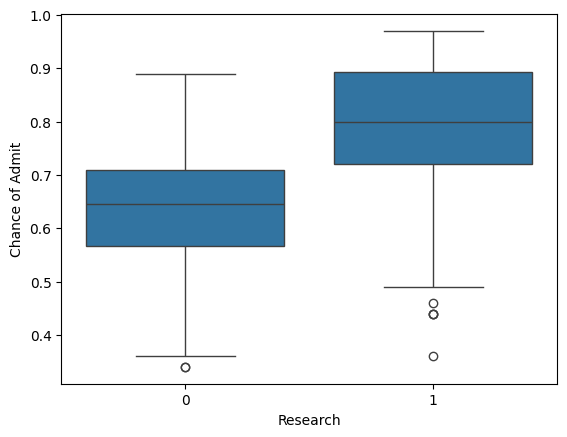

In [33]:
sns.boxplot(x=JEd_df['Research'],y=JEd_df['Chance of Admit'])

<Axes: >

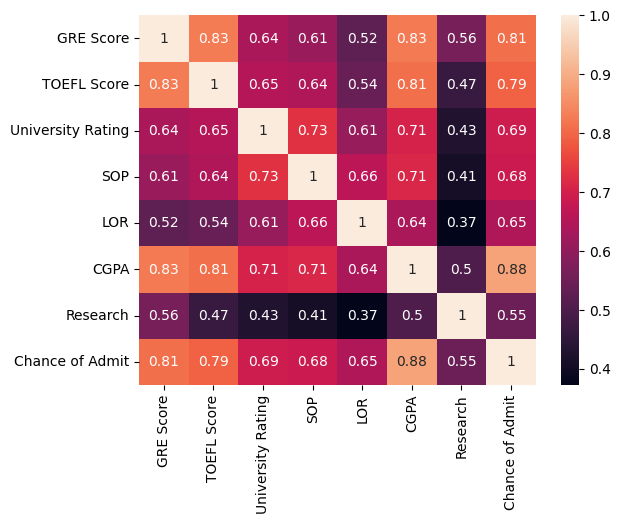

In [34]:
sns.heatmap(JEd_df.corr(),annot=True)

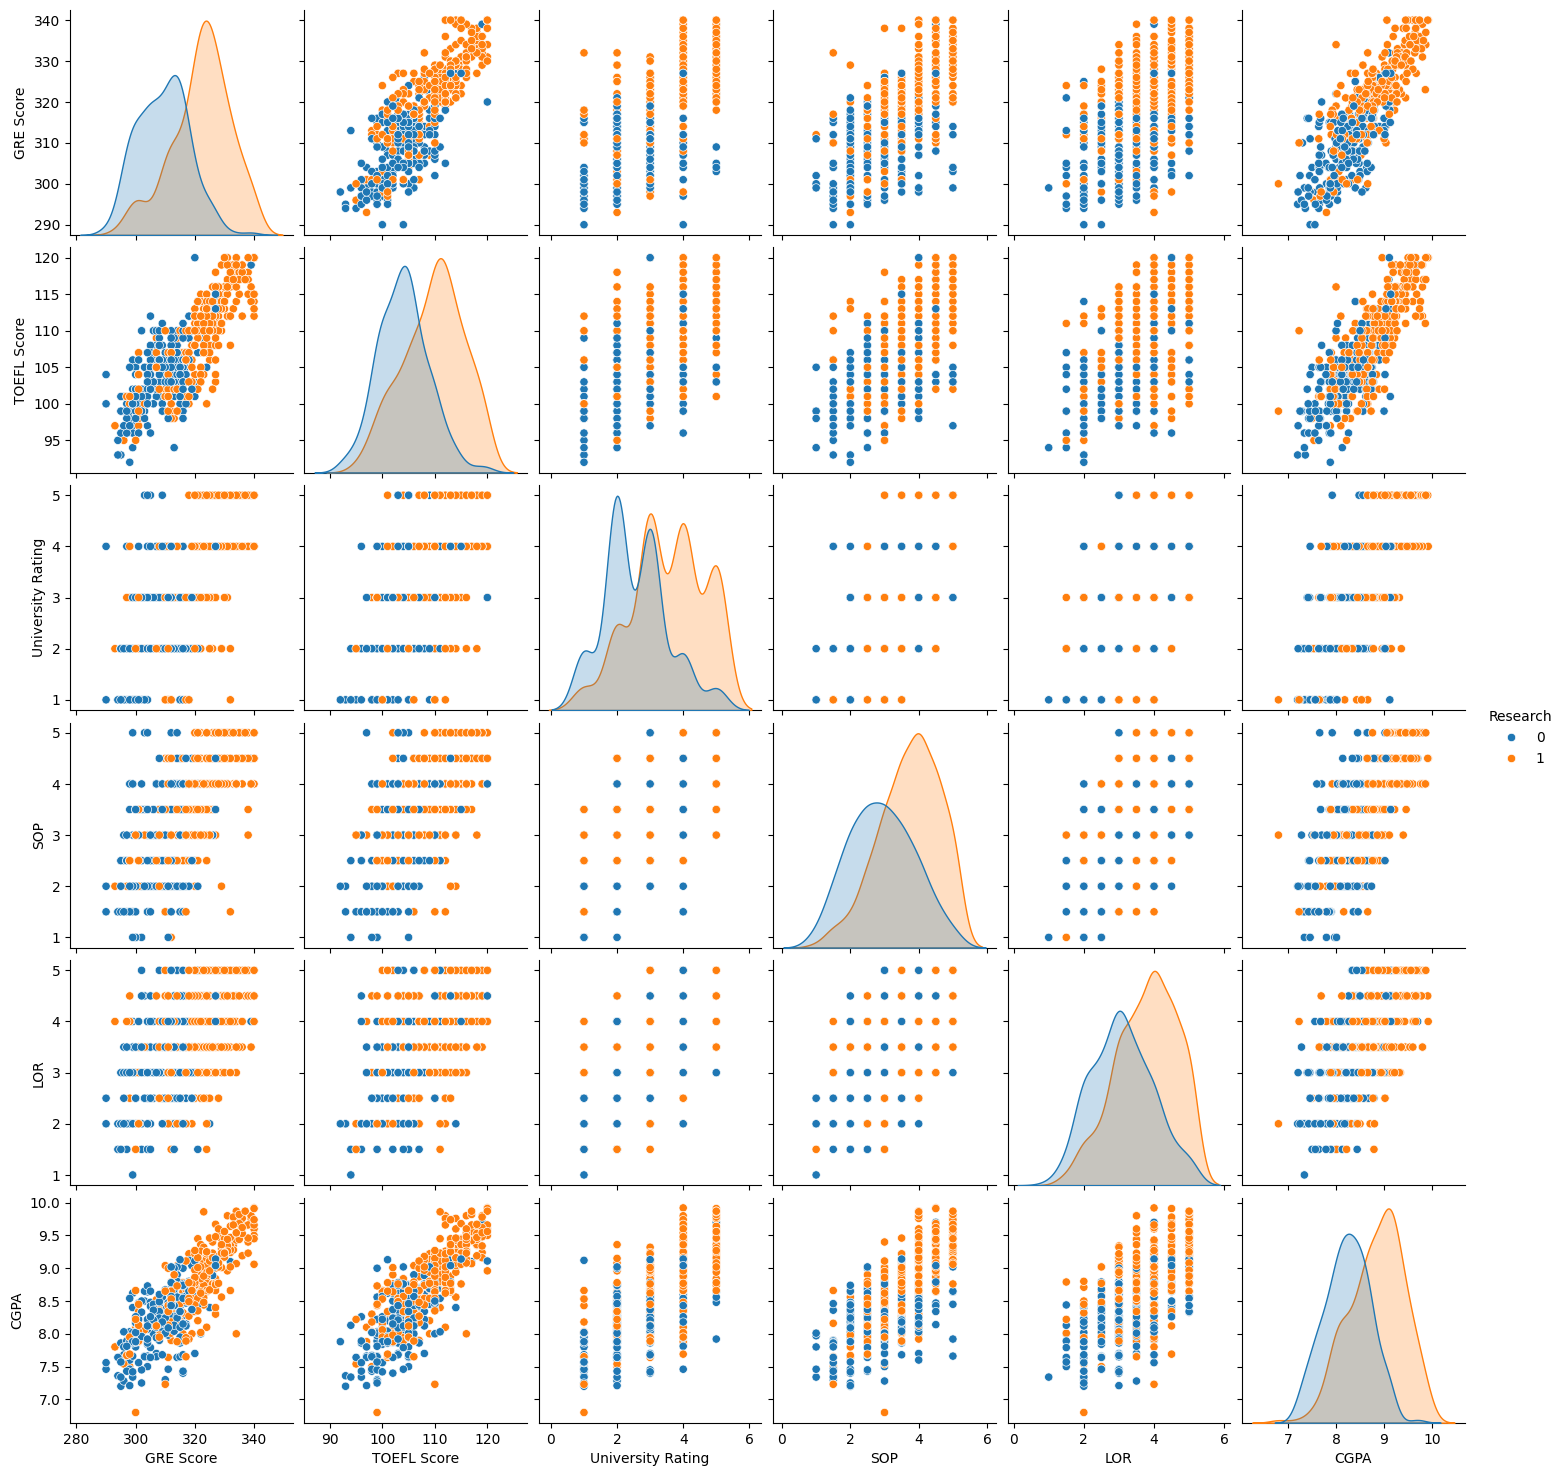

In [35]:
sns.pairplot(JEd_df.drop('Chance of Admit',axis=1),hue='Research') # Relation between Features

## Linear Regression

In [36]:
from sklearn.model_selection import train_test_split

X= JEd_df.drop('Chance of Admit',axis=1)
y = JEd_df['Chance of Admit']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state=42)

In [37]:
X_train.shape,y_train.shape

((400, 7), (400,))

In [38]:
X_test.shape,y_test.shape

((100, 7), (100,))

In [39]:
'''Feature Standardization:'''
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [40]:
import pickle
## Saving the Standardized Scaler
with open("artifacts/scaler.pkl", "wb") as file:
    pickle.dump(std, file)

In [41]:
X_train=pd.DataFrame(X_train_std, columns=X_train.columns)
X_test =pd.DataFrame(X_test_std, columns=X_test.columns)


#### Check for Multicollinearity by VIF

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset,col):
  dataset=dataset.drop(columns=col,axis=1)
  vif=pd.DataFrame()
  vif['features']=dataset.columns
  vif['VIF_Value']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
  return vif

calculate_vif(X_train,[])

,features,VIF_Value
0,GRE Score,4.489983
1,TOEFL Score,3.664298
2,University Rating,2.572110
3,SOP,2.785764
4,LOR,1.977698
5,CGPA,4.654540
6,Research,1.518065


- Since VIF is less than 5 , we can proceed with linear_model.

### Model Building and Selection

In [43]:
np.logspace(-3, 2, 6)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [44]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score

def find_best_model(X_train, y_train, X_test, y_test, alpha_values=[0.001,0.01,0.1,1.0,10.0,100.0]):
    # Define models in a dictionary
    lasso_models = {f"Lasso (alpha={alpha})" : Lasso(alpha=alpha) for alpha in alpha_values}
    ridge_models = {f"Ridge (alpha={alpha})": Ridge(alpha=alpha) for alpha in alpha_values}
    models = {**lasso_models, **ridge_models, 'Linear Regression': LinearRegression()}

    # Define a dictionary to store cross-validation scores for each model
    cv_scores = {}

    # Perform cross-validation for each model
    for model_name, model in models.items():
        # Perform cross-validation
        scores = cross_val_score(model, X_train, y_train, cv=5)
        # Store mean cross-validation score
        cv_scores[model_name] = np.mean(scores)

    # Find the best model
    best_model_name = max(cv_scores, key=cv_scores.get)
    best_model = models[best_model_name]

    # Train the best model on the full training set
    best_model.fit(X_train, y_train)

    # Predict on the test set using the best model
    y_pred = best_model.predict(X_test)

    return y_pred,best_model_name,best_model



In [45]:
y_pred,best_model_name,best_model = find_best_model(X_train, y_train, X_test, y_test)
print('best_model_name :',best_model_name)

'''Prediction of test data with best model'''
from sklearn.metrics import r2_score,mean_squared_error
print('\033[1mPrediction Metrics of Model built using Sklearn :\033[0m')
print('Mean Squared Error :', round(mean_squared_error(y_test.values,y_pred),3))
print('Root Mean Squared Error :', round(np.sqrt(mean_squared_error(y_test.values,y_pred)),3))
print("R-Square: ",round(r2_score(y_test, y_pred),3))

best_model_name : Lasso (alpha=0.001)
Prediction Metrics of Model built using Sklearn :
Mean Squared Error : 0.004
Root Mean Squared Error : 0.061
R-Square:  0.819


#### Mean of Residuals

In [46]:
residuals = y_test.values- y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.005451322458943832


#### Test for Homoscedasticity

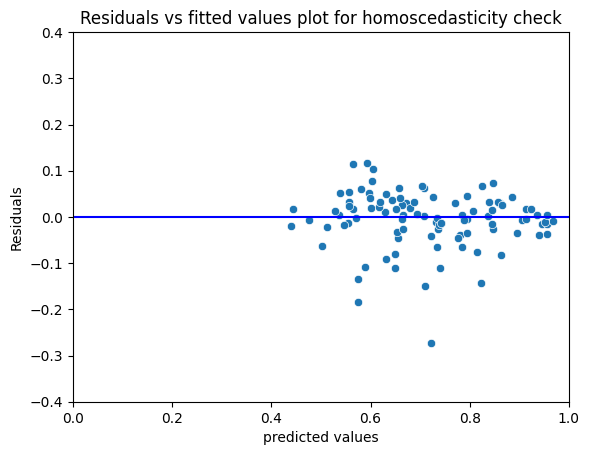

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.scatterplot(x=y_pred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
p = sns.lineplot(x=[0,26], y=[0,0], color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [48]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)

[('F statistic', 0.492529507037837), ('p-value', 0.9888496246613845)]

#### Here `null hypothesis` is - error terms are homoscedastic and since p-values >0.05, we fail to reject the null hypothesis

#### Normality of residuals    

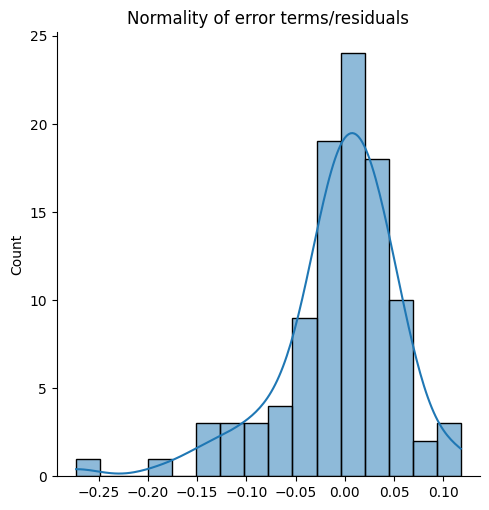

In [49]:
p = sns.displot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Text(0, 0.5, 'y_pred')

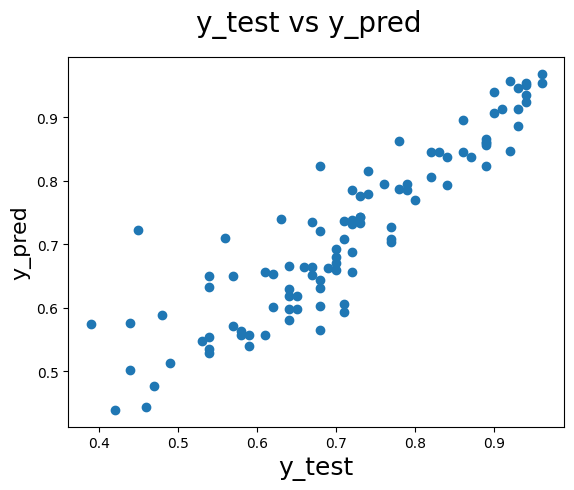

In [50]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test.values, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#### Saving the Model

In [51]:
import pickle

# Save the best_model to a file
with open('artifacts/Regressor.pkl', 'wb') as file:
    pickle.dump(best_model, file)